In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("added_features.csv")
df.head()

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description,Ids,TMDB_Id,...,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western,Bad Words
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts...","(278, [18, 80])",278.0,...,0,0,0,0,0,0,0,0,0,100
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec...","(238, [18, 80])",238.0,...,0,0,0,0,0,0,0,0,0,20
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...,"(155, [18, 28, 80, 53])",155.0,...,0,0,0,0,0,0,1,0,0,5
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,...","(424, [18, 36, 10752])",424.0,...,0,0,0,0,0,0,0,1,0,16
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...,"(389, [18])",389.0,...,0,0,0,0,0,0,0,0,0,1


## Number of Movies Released by Year

Text(0, 0.5, 'Number released')

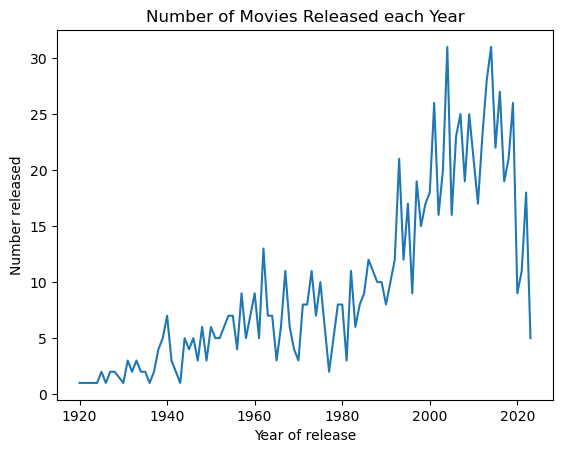

In [94]:
movies_by_year = df['Year of Release'].value_counts().sort_index()

plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released each Year')
plt.xlabel('Year of release')
plt.ylabel('Number released')

## Total gross revenue by year

In [95]:
df['Gross'].loc[df['Gross'] == '#222'] = None ## quick data cleaning

/var/folders/9s/wjp86gfn3yl56f5kv0hr0_fr0000gn/T/ipykernel_36019/1979932267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'].loc[df['Gross'] == '#222'] = None ## quick data cleaning


Text(0, 0.5, 'Total revenue usd (millions)')

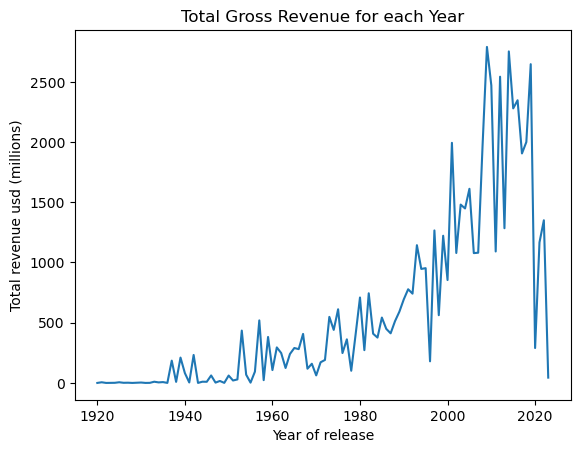

In [96]:
df_gross = df
df_gross['Gross'] = df.loc[df['Gross'].isna() == False]['Gross'].astype(float)
df_gross.groupby('Year of Release')['Gross'].sum().plot()

plt.title('Total Gross Revenue for each Year')
plt.xlabel('Year of release')
plt.ylabel('Total revenue usd (millions)')

## Mean Gross Reveue by year

Text(0, 0.5, 'Total revenue usd (millions)')

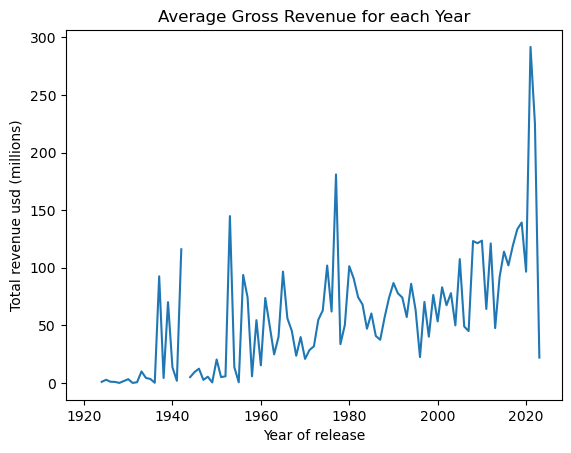

In [108]:
df_gross = df
df_gross['Gross'] = df.loc[df['Gross'].isna() == False]['Gross'].astype(float)
df_gross.groupby('Year of Release')['Gross'].mean().plot()

plt.title('Average Gross Revenue for each Year')
plt.xlabel('Year of release')
plt.ylabel('Total revenue usd (millions)')

In [222]:
df.loc[df['Year of Release'] < 1980].sort_values(by='Gross', ascending=False).head(100)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description,Ids,TMDB_Id,...,Romance,SciFi,TV,Thriller,War,Western,Bad Words,Decade,Group,Gap
30,Star Wars,1977,121,86.0,90.000000,322.74,"14,05,392",Luke Skywalker joins forces with a Jedi Knight...,"(11, [12, 28, 878])",11.0,...,0,1,0,0,0,0,1,1970,1975,4.000000
211,Jaws,1975,124,81.0,87.000000,260.00,"6,33,517",When a killer shark unleashes chaos on a beach...,"(578, [27, 53, 12])",578.0,...,0,0,0,1,0,0,18,1970,1975,6.000000
271,Persona,1966,85,81.0,86.000000,246.00,"1,25,251",A nurse is put in charge of a mute actress and...,"(797, [18])",797.0,...,0,0,0,0,0,0,1,1960,1965,5.000000
289,Les quatre cents coups,1959,99,81.0,8.085714,244.00,"1,23,388","A young boy, left without attention, delves in...","(147, [18])",147.0,...,0,0,0,0,0,0,9,1950,1955,-72.914286
210,The Exorcist,1973,122,81.0,81.000000,232.91,"4,26,238",When a teenage girl is possessed by a mysterio...,"(9552, [27])",9552.0,...,0,0,0,0,0,0,25,1970,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,The Wild Bunch,1969,145,79.0,98.000000,12.06,"87,997",An aging group of outlaws look for one last bi...,"(576, [37])",576.0,...,0,0,0,0,0,1,49,1960,1965,19.000000
420,Anatomy of a Murder,1959,161,80.0,95.000000,11.90,"68,884",An upstate Michigan lawyer defends a soldier w...,"(93, [80, 18, 9648])",93.0,...,0,0,0,0,0,0,5,1950,1955,15.000000
981,The Birds,1963,119,76.0,90.000000,11.40,"1,97,671",A wealthy San Francisco socialite pursues a po...,"(571, [27])",571.0,...,0,0,0,0,0,0,1,1960,1960,14.000000
261,The Red Shoes,1948,135,81.0,8.000000,10.90,"37,278",A young ballet dancer is torn between the man ...,"(486589, [16, 10749, 10751, 35, 14])",486589.0,...,1,0,0,0,0,0,0,1940,1945,-73.000000


In [218]:
df.loc[df['Year of Release'] == 2022]['Gross'].mean()

225.08333333333334

## Watchtime by year of release

Text(0, 0.5, 'Watch time (minutes)')

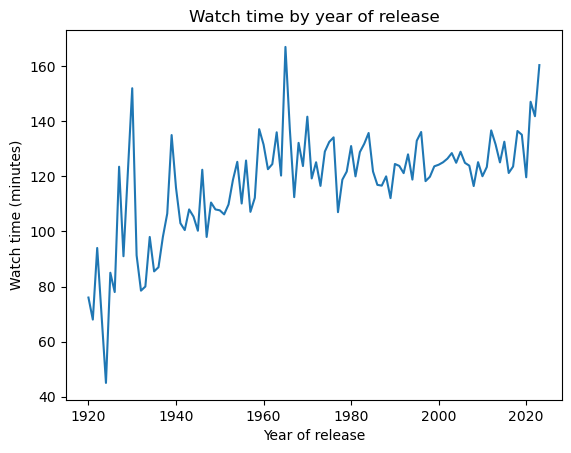

In [127]:
df.groupby('Year of Release')['Watch Time'].mean().plot()
plt.title('Watch time by year of release')
plt.xlabel('Year of release')
plt.ylabel('Watch time (minutes)')

## Average Rating/Metascore by year

In [98]:
def handleRating(value):
    return value * 10

df_rating = df
df_rating['Movie Rating'] = df_rating['Movie Rating'].apply(handleRating)

Text(0, 0.5, 'Score (out of 100)')

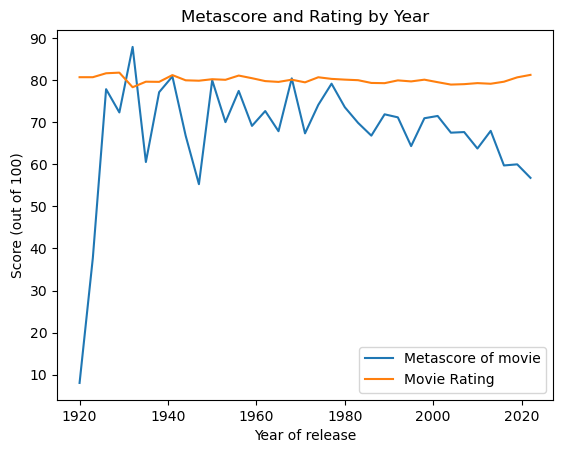

In [105]:
df_rating['Group'] = (df_rating['Year of Release'] // 3) * 3
df_rating.groupby('Group')[['Metascore of movie','Movie Rating']].mean().plot()

plt.title('Metascore and Rating by Year')
plt.xlabel('Year of release')
plt.ylabel('Score (out of 100)')

Text(0, 0.5, 'Fan ranking')

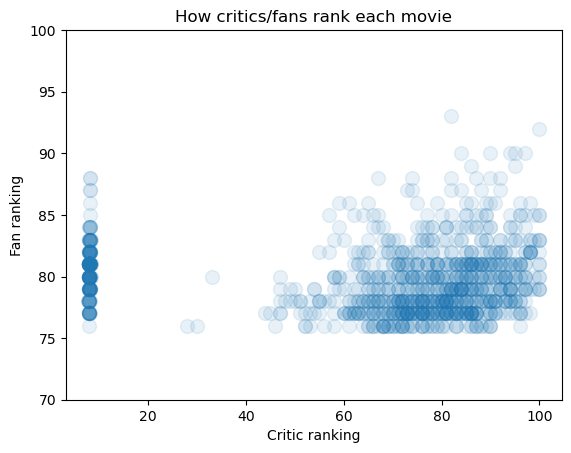

In [125]:
plt.scatter(data=df_rating, x="Metascore of movie", y="Movie Rating", alpha = 0.1, s=100)
plt.ylim(70, 100)
plt.title('How critics/fans rank each movie')
plt.xlabel('Critic ranking')
plt.ylabel('Fan ranking')

## The gap between fans and critics is growing

Text(0, 0.5, 'Year of release')

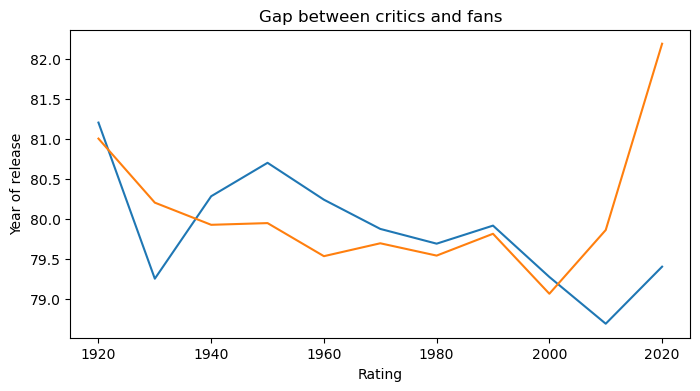

In [225]:
df_rating['Group'] = (df_rating['Year of Release'] // 10) * 10

gt = df_rating.loc[df['Metascore of movie'] > df['Movie Rating']]
lt = df_rating.loc[df['Metascore of movie'] < df['Movie Rating']]
eq = df_rating.loc[df['Metascore of movie'] == df['Movie Rating']]


fig, ax = plt.subplots(figsize=(8, 4))

gt.groupby('Group')['Movie Rating'].mean().plot(label='Critics')
lt.groupby('Group')['Movie Rating'].mean().plot(label='Fans')

plt.title('Gap between critics and fans')
plt.xlabel('Rating')
plt.ylabel('Year of release')

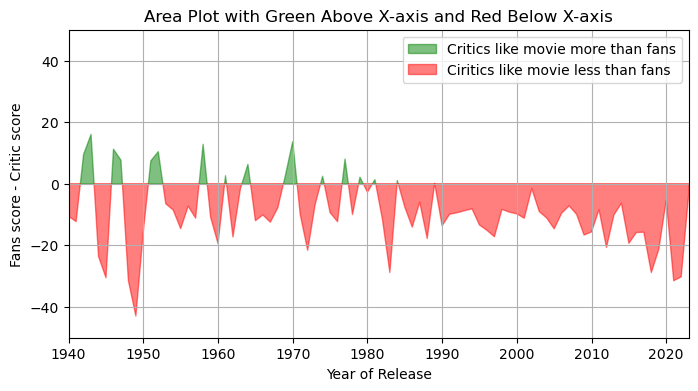

In [226]:

fig, ax = plt.subplots(figsize=(8, 4))


ax.fill_between(gap.index, gap, where=(gap >= 0), interpolate=True, color='green', alpha=0.5, label='Critics like movie more than fans')
ax.fill_between(gap.index, gap, where=(gap < 0), interpolate=True, color='red', alpha=0.5, label='Ciritics like movie less than fans')

ax.set_xlabel('Year of Release')
ax.set_ylabel('Fans score - Critic score')
ax.set_title('Area Plot with Green Above X-axis and Red Below X-axis')
ax.legend()

plt.ylim(-50, 50)
plt.xlim(1940, 2023)


plt.grid(True)
plt.show()

# Genres

In [239]:
genre_keys = {

    28       :   "Action",
    12       :   "Adventure",
    16       :   "Animation",
    35       :   "Comedy",
    80       :   "Crime",
    18       :   "Drama",
    10751    :   "Family",
    14       :   "Fantasy",
    36       :   "History",
    27       :   "Horror",
    10402    :   "Music",
    9648     :   "Mystery",
    10749    :   "Romance",
    878      :   "SciFi",
    53       :   "Thriller",
    10752    :   "War",
    37       :   "Western"
    
}

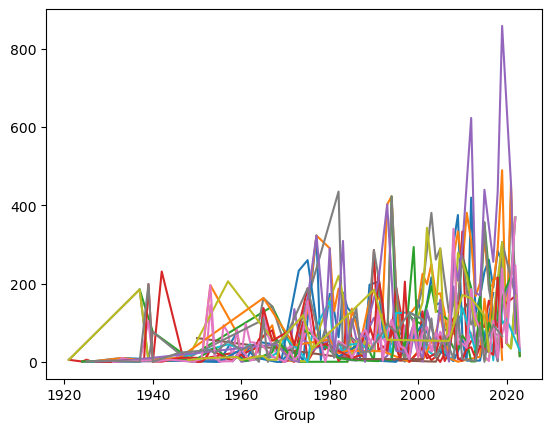

In [193]:
df_genre = df
df_genre['Group'] = (df_rating['Year of Release'] // 1) * 1
for genre in genre_keys.values():
    df_genre.loc[df[genre] == 1].dropna().groupby('Group')['Gross'].mean().plot()

## Ok lol we're just going to go with the top K genres

In [210]:
genres = [
    
    'Drama', 
    'Romance',


    'SciFi',

    
]

Text(0.5, 0, 'Year of Release')

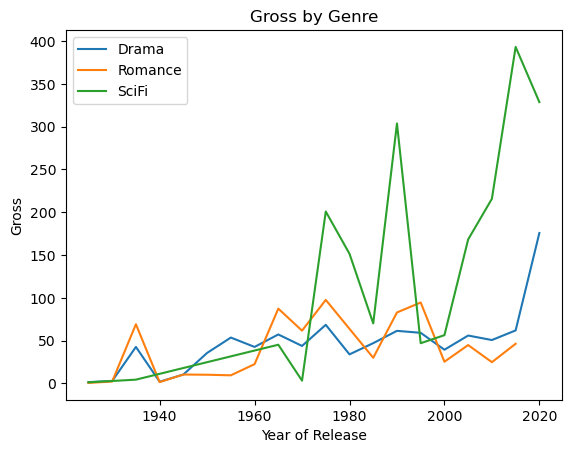

In [227]:
df_genre = df
df_genre['Group'] = (df_rating['Year of Release'] // 5) * 5


fig, ax = plt.subplots()

for genre in genres:
    s = df_genre.loc[df[genre] == 1].dropna().groupby('Group')['Gross'].mean()
    plt.plot(s.index, s, label="1")
    
ax.legend(genres)

plt.title("Gross by Genre")
plt.ylabel("Gross")
plt.xlabel("Year of Release")

In [240]:
genre_bad_words_avg = []
for genre in genre_keys.values():
    genre_bad_words_avg.append((genre, df.loc[df[genre] == 1]['Bad Words'].mean()))
    
genre_bad_words_avg.sort(key = lambda x: x[1], reverse = True)
words = []
genres = []
for genre, total in genre_bad_words_avg:
    print("{:12s} {:3.2f}".format(genre, total))
    words.append(total)
    genres.append(genre)

Crime        58.05
Music        54.67
Western      46.44
Thriller     37.48
Action       32.85
History      31.99
Drama        31.82
Comedy       28.71
Mystery      21.16
War          21.05
Horror       20.19
SciFi        20.10
Romance      14.74
Adventure    13.44
Fantasy      10.79
Animation    9.36
Family       4.41


/var/folders/9s/wjp86gfn3yl56f5kv0hr0_fr0000gn/T/ipykernel_36019/3216467895.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genres, rotation=45)


Text(0, 0.5, 'Number of Bad Words')

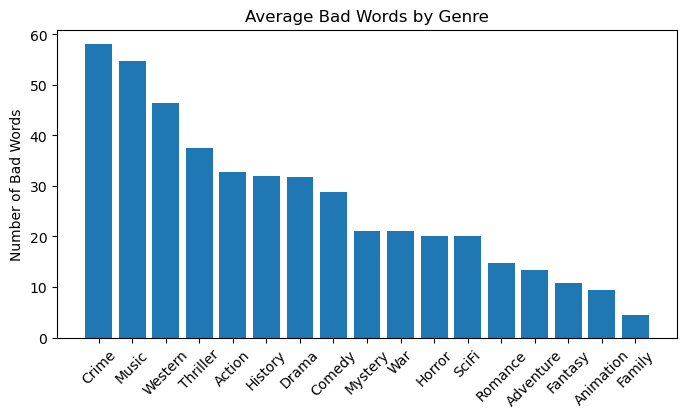

In [242]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(genres, rotation=45)
plt.bar(genres, words)
plt.title("Average Bad Words by Genre")
plt.ylabel("Number of Bad Words")

In [243]:
genre_gross_avg = []
for genre in genre_keys.values():
    genre_gross_avg.append((genre, df.loc[df[genre] == 1]['Gross'].mean()))
    
genre_gross_avg.sort(key = lambda x: x[1], reverse = True)
gross = []
genres = []
for genre, total in genre_gross_avg:
    print("{:12s} {:3.2f}".format(genre, total))
    gross.append(total)
    genres.append(genre)

Adventure    187.25
SciFi        182.25
Family       151.08
Action       147.54
Animation    128.64
Fantasy      118.86
Comedy       70.71
Music        64.83
Western      63.46
Thriller     62.35
War          52.73
History      51.83
Drama        51.51
Mystery      49.89
Crime        48.29
Romance      44.03
Horror       42.99


/var/folders/9s/wjp86gfn3yl56f5kv0hr0_fr0000gn/T/ipykernel_36019/954829166.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genres, rotation=45)


Text(0, 0.5, 'Gross (Millions USD)')

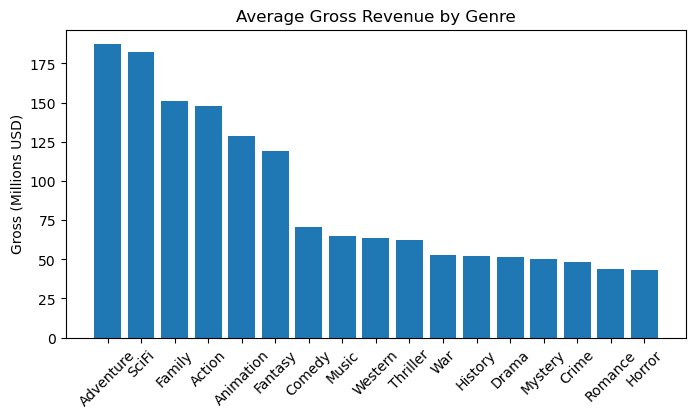

In [245]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(genres, rotation=45)
plt.bar(genres, gross)
plt.title("Average Gross Revenue by Genre")
plt.ylabel("Gross (Millions USD)")